### Importing libraries needed for project

In [257]:
#importing libraires I will most likely need
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Load in our stroke data as a dataframe

In [198]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [199]:
pd.set_option('display.max_rows', 200)

### Exploratory Data Analysis & Cleaning

In [200]:
#looking at the first 30 rows of our stroke data
stroke_data.head(17)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [201]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [202]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [203]:
#I don't need the id column so I drop it
new_stroke_df = stroke_data.drop('id', axis=1)

In [204]:
#number of people with vs without stroke from dataset
new_stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [205]:
#number of people with vs without heart_disease from dataset
new_stroke_df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [206]:
#number of people with vs without hypertension from dataset
new_stroke_df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [207]:
new_stroke_df['age'].max()

82.0

In [208]:
new_stroke_df['age'].min()

0.08

<AxesSubplot:xlabel='stroke', ylabel='count'>

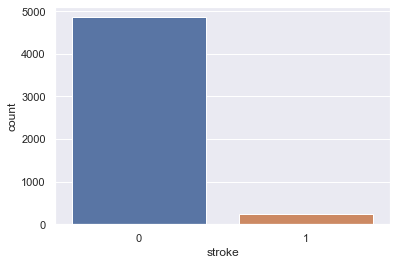

In [209]:
# number of people with and without stroke
sns.set_theme(style="darkgrid")
sns.countplot(new_stroke_df['stroke'])

In [210]:
#view the correlation between numerical attributes in the dataset
new_stroke_df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [211]:
###check columns with null values
stroke_data.columns[stroke_data.isnull().any()]

Index(['bmi'], dtype='object')

luckily, only the bmi column has null values, so let's see how many null values there are to give us an idea the best way to deal with this problem

In [212]:
stroke_data['bmi'].isnull().sum(axis = 0)

201

since we have very small percentage of people with stroke from the dataset, it won't be wise to remove rows with null bmi values if the stroke value is positive (1). So checking to see what the stroke value was for the NaN bmi's will give a better idea what next to do

In [213]:
new_stroke_df[new_stroke_df['bmi'].isnull()& (new_stroke_df['stroke']==1)].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,40.000000,40.00000,40.000000,40.000000,0.0,40.0
mean,67.808000,0.15000,0.175000,121.955500,NaN,1.0
std,14.478762,0.36162,0.384808,58.622789,NaN,0.0
min,1.320000,0.00000,0.000000,57.920000,NaN,1.0
25%,61.000000,0.00000,0.000000,75.245000,NaN,1.0
50%,74.000000,0.00000,0.000000,101.450000,NaN,1.0
75%,77.250000,0.00000,0.000000,174.712500,NaN,1.0
max,80.000000,1.00000,1.000000,237.750000,NaN,1.0


In [214]:
#I will replace the NaN bmi values with the mean bmi of that column
new_stroke_df['bmi'].fillna(value=new_stroke_df['bmi'].mean(),inplace=True)

In [215]:
#look at what our data looks like again
new_stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [216]:
#double check to make sure no null values
new_stroke_df.columns[new_stroke_df.isnull().any()]

Index([], dtype='object')

In [217]:
new_stroke_df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Smoking status of "Unknown" doesn't help us much but it will also be unwise to randomly replace with one of the other smoking status labels since these are the 2nd largest in the dataset with 1544 records, so I check to see how many of 'Unknown' labels are also stroke positive since the dataset is imbalanced (very few stroke positive samples which is our target)

In [218]:
new_stroke_df.loc[(new_stroke_df['smoking_status']=='Unknown')&(new_stroke_df['stroke']==1)].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,65.836596,0.085106,0.170213,124.808936,29.176133,1.0
std,16.236866,0.282057,0.379883,57.067115,5.022184,0.0
min,1.320000,0.000000,0.000000,57.930000,19.400000,1.0
25%,58.000000,0.000000,0.000000,80.065000,26.950000,1.0
50%,71.000000,0.000000,0.000000,101.450000,28.893237,1.0
75%,77.500000,0.000000,0.000000,179.755000,29.596618,1.0
max,82.000000,1.000000,1.000000,219.910000,45.900000,1.0


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

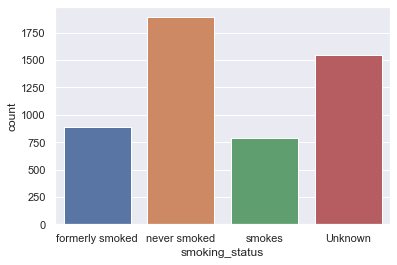

In [219]:
sns.set_theme(style="darkgrid")
sns.countplot(new_stroke_df['smoking_status'])

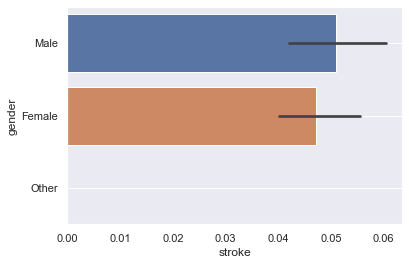

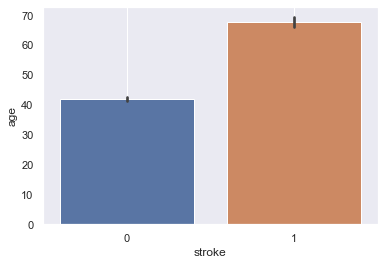

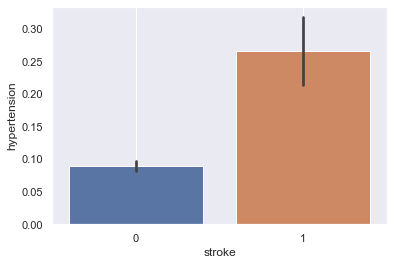

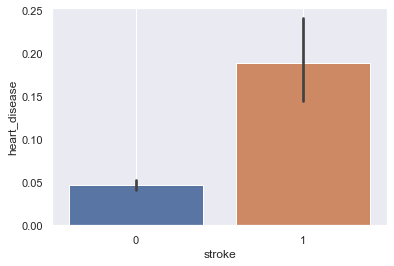

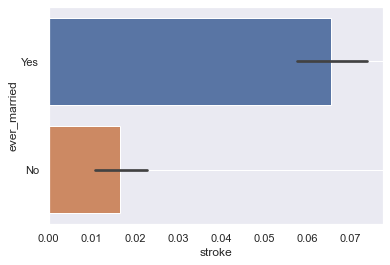

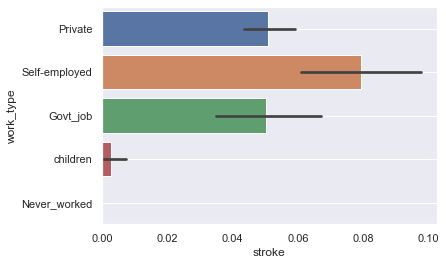

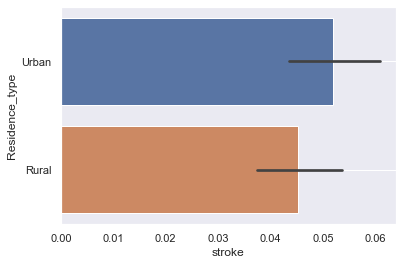

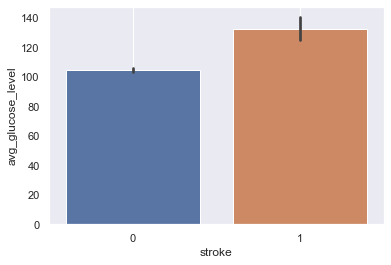

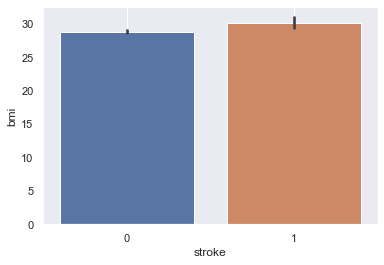

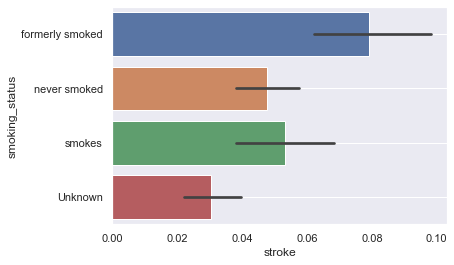

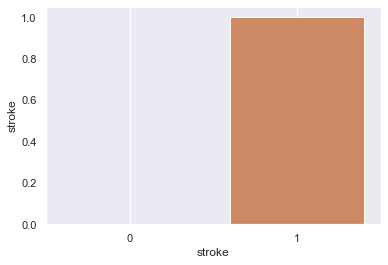

In [220]:
#see how stroke relates with the other attributes given in the data
for i, column in enumerate(new_stroke_df.columns):
    sns.barplot(x='stroke', y=column, data=new_stroke_df)
    plt.grid()
    plt.show()

from the above, we see that stroke is slightly higher amongst males, the higher the age the more prone to stroke people get,those who have suffered hypertension are more likely to stroke, those that have suffered heart disease are more likely to suffer stroke, married people are more likely to suffer stroke, self-employed people are most likely to suffer stroke,those with higer glucose levels are more likely to suffer stroke, those who have formely smoked are more likely to suffer stroke followed by those that smoke and so on as seen from the figures above.

#### Data Encoding

In [221]:
#using label encoding for the categorical columns with text values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [222]:
new_stroke_df['avg_glucose_level'] = le.fit_transform(new_stroke_df['avg_glucose_level'])
new_stroke_df['hypertension'] = le.fit_transform(new_stroke_df['hypertension'])
new_stroke_df['heart_disease'] =le.fit_transform(new_stroke_df['heart_disease'])
new_stroke_df['ever_married'] = le.fit_transform(new_stroke_df['ever_married'])
new_stroke_df['Residence_type'] = le.fit_transform(new_stroke_df['Residence_type'])
new_stroke_df['smoking_status'] =le.fit_transform(new_stroke_df['smoking_status'])
new_stroke_df['work_type'] =le.fit_transform(new_stroke_df['work_type'])
new_stroke_df['gender'] =le.fit_transform(new_stroke_df['gender'])

In [223]:
new_stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,3850,36.600000,1,1
1,0,61.0,0,0,1,3,0,3588,28.893237,2,1
2,1,80.0,0,1,1,2,0,2483,32.500000,2,1
3,0,49.0,0,0,1,2,1,3385,34.400000,3,1
4,0,79.0,1,0,1,3,0,3394,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,1360,28.893237,2,0
5106,0,81.0,0,0,1,3,1,3030,40.000000,2,0
5107,0,35.0,0,0,1,3,0,1314,30.600000,2,0
5108,1,51.0,0,0,1,2,0,3363,25.600000,1,0


#### Feature scaling

In [225]:
#transform the data to be on same scale using sklearn's StandardScaler()
from sklearn.preprocessing import StandardScaler

In [226]:
scale = StandardScaler()

In [227]:
X = new_stroke_df.drop('stroke',axis=1)
y = new_stroke_df['stroke']

In [228]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,3850,36.600000,1
1,0,61.0,0,0,1,3,0,3588,28.893237,2
2,1,80.0,0,1,1,2,0,2483,32.500000,2
3,0,49.0,0,0,1,2,1,3385,34.400000,3
4,0,79.0,1,0,1,3,0,3394,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,1360,28.893237,2
5106,0,81.0,0,0,1,3,1,3030,40.000000,2
5107,0,35.0,0,0,1,3,0,1314,30.600000,2
5108,1,51.0,0,0,1,2,0,3363,25.600000,1


In [229]:
X = scale.fit_transform(X)

In [230]:
X

array([[ 1.18807255e+00,  1.05143428e+00, -3.28601864e-01, ...,
         1.78017003e+00,  1.00123401e+00, -3.51780710e-01],
       [-8.40343999e-01,  7.86070073e-01, -3.28601864e-01, ...,
         1.54302885e+00,  1.38466607e-15,  5.81552327e-01],
       [ 1.18807255e+00,  1.62639008e+00, -3.28601864e-01, ...,
         5.42872325e-01,  4.68577254e-01,  5.81552327e-01],
       ...,
       [-8.40343999e-01, -3.63841511e-01, -3.28601864e-01, ...,
        -5.15211816e-01,  2.21736316e-01,  5.81552327e-01],
       [ 1.18807255e+00,  3.43796387e-01, -3.28601864e-01, ...,
         1.33937707e+00, -4.27845098e-01, -3.51780710e-01],
       [-8.40343999e-01,  3.42048064e-02, -3.28601864e-01, ...,
        -3.88495153e-01, -3.49895329e-01, -1.28511375e+00]])

In [231]:
#splitting the data into my train and test set in a stratified fashion using the stroke labels so there is a well 
#distributed proportion of stroke labels in each set since there are few stroke positive samples compared to the rest 
#of the samples.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [232]:
#so we can see how many of each instances of the stroke's labels are in our dependent variable
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3889,  199]))

I am going to use an oversampling technique called SMOTE since this dataset is very imbalanced with far less number of stroke patients

In [233]:
from imblearn.over_sampling import SMOTE

In [234]:
#using SMOTE to resample the training set
smt = SMOTE(random_state=42)
X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

In [235]:
#so we can see how many instance of each class labels in our dependent variable after SMOTE
np.unique(y_train_sm, return_counts=True)

(array([0, 1]), array([3889, 3889]))

### Using logisctic regression for classification/prediction

In [236]:
#building our first model; a logistic classifier
model = LogisticRegression().fit(X_train_sm,y_train_sm)

In [237]:
#using the trained model on the test set
pred_y = model.predict(X_test)

In [238]:
print("Score on training set: {}".format(model.score(X_train,y_train)))
print("Score on test set: {}".format(model.score(X_test,y_test)))

Score on training set: 0.7438845401174168
Score on test set: 0.7583170254403131


In [239]:
#using classification report to also view more important metrics such as precision and recall,we can see the logistic 
#regression did quite well
print("Claasification report")
print(classification_report(y_test, pred_y))

Claasification report
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       972
           1       0.14      0.80      0.24        50

    accuracy                           0.76      1022
   macro avg       0.57      0.78      0.55      1022
weighted avg       0.95      0.76      0.83      1022



The logistic regression model has an ok score of 0.743 from the training data & 0.758 on the test on the test set

In [240]:
#using a confusion matrix to see the number of correctly classified samples for our test data
from sklearn.metrics import confusion_matrix

In [241]:
cm = confusion_matrix(y_test, pred_y)
print(np.unique(y_test, return_counts=True))
print(np.unique(pred_y, return_counts=True))
print(cm)

(array([0, 1]), array([972,  50]))
(array([0, 1]), array([745, 277]))
[[735 237]
 [ 10  40]]


Text(80.90000000000006, 0.5, 'true values')

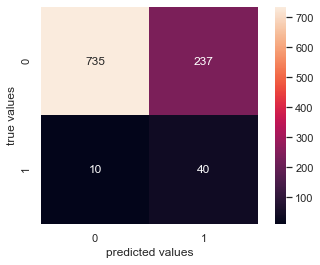

In [242]:
#we can see that we have 735 True negatives (no stroke) and 40 True postives (stroke) and a low false negative
#which is quite good given we don't want to miss knowing patients likely to have stroke so we could warn them
#Using a heatmap to make the results from the confusion matrix of our logistic model better readable
sns.heatmap(cm,square=True,annot=True,fmt='d',cbar='True')
plt.xlabel('predicted values')
plt.ylabel('true values')

### Using Random Forest for classification/prediction

In [243]:
#I would use cross validation here as random forests have a lot of hyperparameters in order to make sure the model 
#would generalize well and also help with tuning parameters
from sklearn.model_selection import cross_val_score

In [244]:
#Using a random forest classifier with 10 trees after parameter tuning with the help of cross_validation and 
#enabling bootstrapping so we use different combinations of features to build each tree
rf_clf = RandomForestClassifier(n_estimators=10, bootstrap=True,max_depth=16, random_state=0)

In [245]:
#using 5 fold cross-validation
scores = cross_val_score(rf_clf,X_train_sm,y_train_sm,cv=5)

In [246]:
scores

array([0.91195373, 0.96079692, 0.95308483, 0.96527331, 0.95434084])

In [247]:
#checking the average accuracy from our cross validation and standard deviation
#we have a low standard deviation which is a good indicator this model performs well
print("%0.2f accuracy and standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy and standard deviation of 0.02


In [248]:
rf_clf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(max_depth=16, n_estimators=10, random_state=0)

In [249]:
print("Score on training set: {}".format(rf_clf.score(X_train,y_train)))
print("Score on test set: {}".format(rf_clf.score(X_test,y_test)))

Score on training set: 0.9816536203522505
Score on test set: 0.9070450097847358


In [250]:
y_pred = rf_clf.predict(X_test)

In [251]:
#we can see that our random forest model has a slightly better precision but a far worse recall on 
#the stroke positive class  
print("Claasification report")
print(classification_report(y_test, y_pred))

Claasification report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.15      0.20      0.17        50

    accuracy                           0.91      1022
   macro avg       0.56      0.57      0.56      1022
weighted avg       0.92      0.91      0.91      1022



In [252]:
#using a confusion matrix to see how many of our predictions were correct on the test set using random forest
rf_cm = confusion_matrix(y_test, y_pred)
print(np.unique(y_test, return_counts=True))
print(np.unique(y_pred, return_counts=True))
print(rf_cm)

(array([0, 1]), array([972,  50]))
(array([0, 1]), array([957,  65]))
[[917  55]
 [ 40  10]]


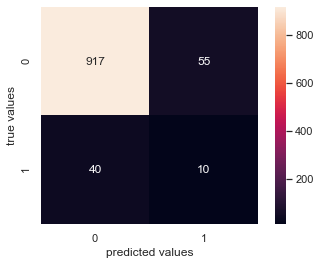

In [253]:
#using a heatmap to make the random forest's confusion matrix for the test set more readable
sns.heatmap(rf_cm,square=True,annot=True,fmt='d',cbar='True')
plt.xlabel('predicted values')
plt.ylabel('true values');

From the above, we see that the random forest generalizes well and correctly identifies 5 stroke patients on the data it hasn't been exposed to before. The model also correctly identifies 970 non-stroke patients.This is considered good because from the original dataset 95.1% of the samples don't have stroke. We also see it does very well on the 

### Using KNN for classification/prediction

In [254]:
from sklearn.neighbors import KNeighborsClassifier

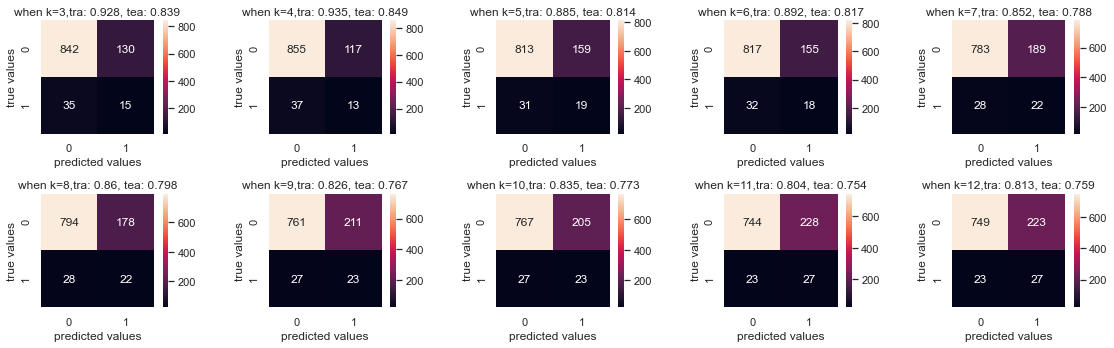

In [255]:
#although there is no clear cut out way to find the optimal value of k, I will try k within 
#the range 3 to 13 and pick the value of k with the best result for this problem
neighbors = np.arange(3,13)

fig, axes = plt.subplots(2,5,figsize=(16,5))

for ax, neighbor in zip(axes.flat, neighbors):
    knn_model = KNeighborsClassifier(n_neighbors = neighbor)
    knn_model.fit(X_train_sm,y_train_sm)
    knn_y_pred = knn_model.predict(X_test)
    y_ =  knn_model.predict(X_train)
    knn_cm = confusion_matrix(y_test, knn_y_pred)
    sns.heatmap(knn_cm,square=True,annot=True,fmt='d',cbar='True',ax=ax)
    ax.set_title("when k={},tra: {}, tea: {}".format(
        neighbor,round(knn_model.score(X_train,y_train),3),round(knn_model.score(X_test,y_test),3)))
    #'tra' refers to training set accuracy and 'tea' refers to test set accuracy
    ax.set_xlabel('predicted values')
    ax.set_ylabel('true values');
    
plt.tight_layout()
plt.show()

we see from the output above, our results vary quite a bit based on the value of k. In choosing the value for k,since we have 2 classes, I decided to go for an odd value of k that generalizes well both on the training and test set although you can also break ties when they happen. I would go for k=5 as it generalizes quite well on the data and has a lower false negative than k=3 since what we our looking at predicting is catching the possibilities of stroke and we don't want to miss this in patients it could happen to so there is the possiblity of preventing its occurence

In [256]:
chosen_knn_model = KNeighborsClassifier(n_neighbors = 5)
chosen_knn_model.fit(X_train_sm,y_train_sm)
knn_y_pred = chosen_knn_model.predict(X_test)
print("Claasification report")
print(classification_report(y_test, knn_y_pred))

Claasification report
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       972
           1       0.11      0.38      0.17        50

    accuracy                           0.81      1022
   macro avg       0.54      0.61      0.53      1022
weighted avg       0.92      0.81      0.86      1022

